#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de las Semanas 5 y 6**
###**Problema de asignación de créditos: South German Dataset.**

## **Nombre y matrícula:**
Enma Galindo

A01795095

# **Parte I: Partición, análisis y pre-procesamiento de los datos.**

## **Ejercicio 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix



In [ ]:
# Cargamos los datos:

df = pd.read_csv ("/content/drive/MyDrive/MNA - Ciencia y Análisis de Datos /SouthGermanCredit.asc",sep=' ')
print(df.shape)
df.head(3)

(1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


In [ ]:
# Renombra los nombres de las columnas del alemán al inglés y desplegamos de
# nuevo el DataFrame para ver el resultado obtenido:

# ************* Inlcuye aquí tu código:*****************************

with open("/content/drive/MyDrive/MNA - Ciencia y Análisis de Datos /codetable.txt", "r") as archivo:
    for linea in archivo.readlines():
      if linea.startswith("$"):
        traduccion = linea.replace("`",'').replace("$","").replace(" ","").replace("\n","").split("=")
        df = df.rename(columns={traduccion[0]: traduccion[1]})


# *********** Aquí termina la sección de agregar código *************

df.head().T

,0,1,2,3,4
status,1,1,2,1,1
duration,18,9,12,12,12
credit_history,4,4,2,4,4
purpose,2,0,9,0,0
amount,1049,2799,841,2122,2171
savings,1,1,2,1,1
employment_duration,2,3,4,3,3
installment_rate,4,2,2,3,4
personal_status_sex,2,3,2,3,3
other_debtors,1,1,1,1,1


In [ ]:
# Obtener las variables presentes en el DataFrame
variables = df.columns

# Mostrar las variables
print(variables)

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


## **Ejercicio 2**

In [ ]:
# Los datos originales tienen en la variable de salida "credit_risk" a la clase negativa (buen cliente) con el valor de 1
# y a la clase de interés positiva (mal cliente) con el valor de 0. Realiza a continuación una transformación para que la
# clase negativa (buen cliente) quede ahora con el valor de 0 y la clase positiva (mal cliente) quede con el valor de 1.

# ************* Inlcuye aquí tu código:*****************************

print(df['credit_risk'].value_counts())
df['credit_risk'] = df['credit_risk'].map({0: 1, 1: 0})
# *********** Aquí termina la sección de agregar código *************


print(df['credit_risk'].value_counts())

1    700
0    300
Name: credit_risk, dtype: int64
0    700
1    300
Name: credit_risk, dtype: int64


## **Ejercicio 3**

In [ ]:
# Realiza una partición de 70-15-15 en entrenamiento, validación y prueba.
# Los nombres de los conjuntos deberán ser como se indican en los print de abajo:

Xtrain, temp_data = train_test_split(df, test_size=0.3, random_state=69)
Xval, Xtest = train_test_split(temp_data, test_size=0.5, random_state=69)

ytrain = Xtrain['credit_risk']
yval = Xval['credit_risk']
ytest = Xtest['credit_risk']

Xtrain = Xtrain.drop(columns=['credit_risk'])
Xval = Xval.drop(columns=['credit_risk'])
Xtest = Xtest.drop(columns=['credit_risk'])
# *********** Aquí termina la sección de agregar código *************

# Mostremos las dimensiones de la partición generada:
print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(700, 20) (700,)
(150, 20) (150,)
(150, 20) (150,)


## **Ejercicio 4**

### **Describe a continuación la información de cada variable: su descripción, el tipo de variable y para el caso de las categóricas, el total de niveles que tiene.**

### **Variables Categóricas:**

1.  status (Estado de cuenta corriente). (4 niveles, nominal)
2.  credit_history (Historial crediticio). (5 niveles, nominal)
3.  purpose (Propósito del crédito). (11 niveles, nominal)
4.  savings (Ahorros que se tienen). (5 niveles, nominal)
7.  personal_status_sex (Estado personal/sexo). (4 niveles, nominal)
8.  other_debtors (Otros deudores). (4 niveles, nominal)
11. other_installment_plans (Otros planes de cuotas). (3 niveles, nominal)
15. people_liable (Personas responsables). (2 niveles, binaria)
16. telephone (Teléfono). (2 niveles, binaria)
17. foreign_worker (Trabajador extranjero). (2 niveles, binaria)
18. credit_risk (Riesgo crediticio). (2 niveles, binaria)
5.  employment_duration (Duración en el empleo). (5 niveles, ordinal)
6.  installment_rate (Tasa de cuota). (4 niveles, ordinal)
9.  present_residence (Tiempo en residencia actual). (4 niveles, ordinal)
10. property (Tipo de propiedades). (4 niveles, ordinal)
12. housing (Tipo de vivienda). (3 niveles, ordinal)
13. number_credits (Número de créditos). (4 niveles, ordinal)
14. job (Trabajo). (4 niveles, ordinal)




### **Variables Numéricas:**
1.  Duration
2.  Amount
3.  Age

## **Ejercicio 5**

### Análisis descriptivo de las variables usando el conjunto de entrenamiento.

### Incluye a continuación todo el código que consideres necesario para analizar las variables y decidir en dado caso qué transformaciones les estarías aplicando.

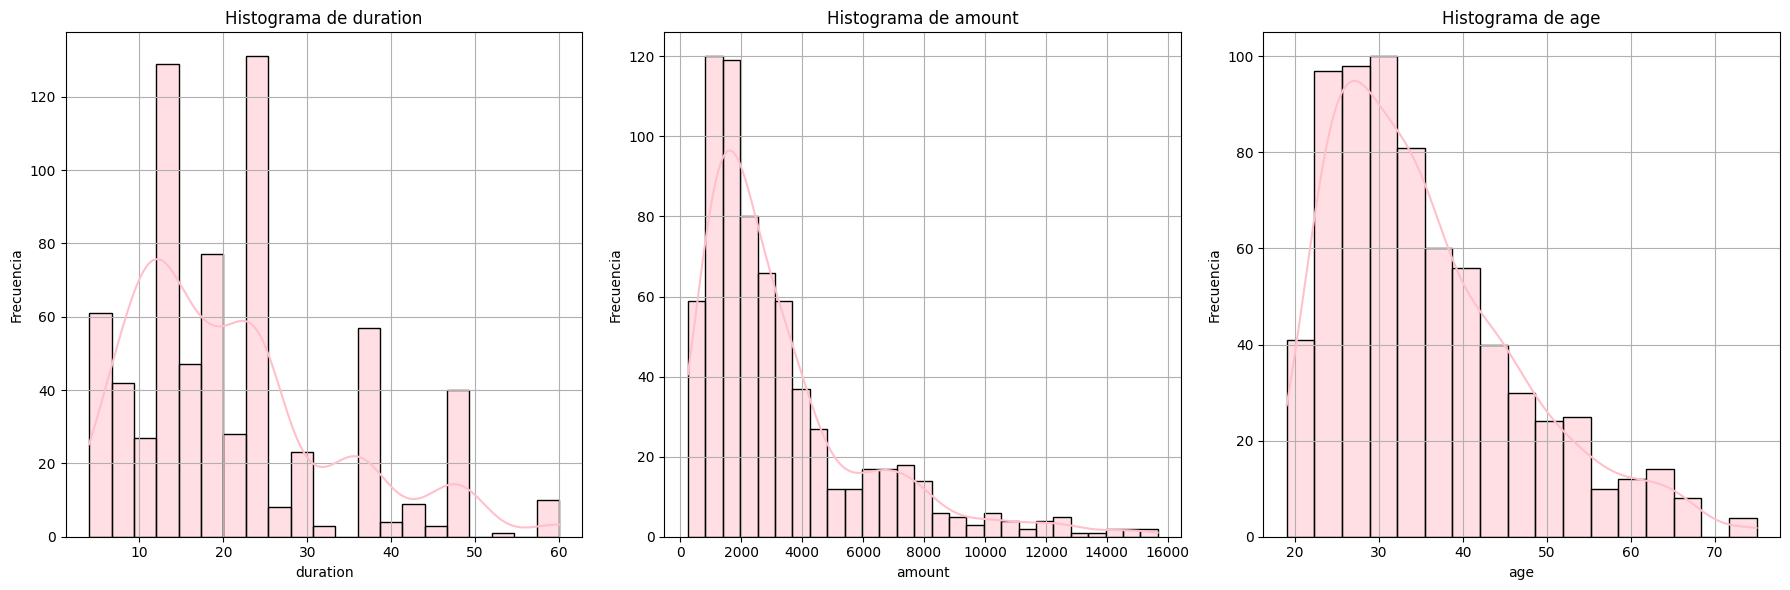

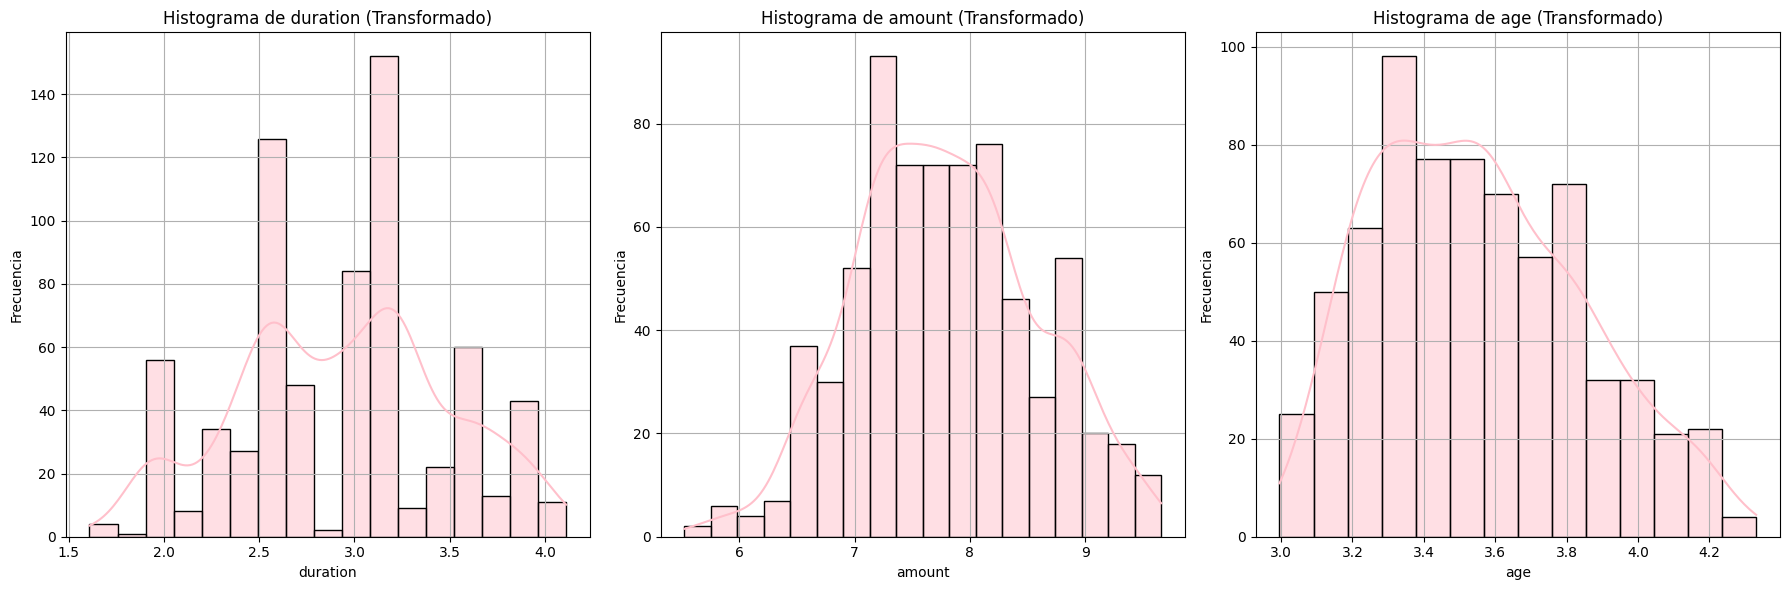

In [ ]:


numeric_columns = ['duration', 'amount', 'age']
numeric_data = Xtrain[numeric_columns]

plt.figure(figsize=(18, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(numeric_data[column], kde=True, color='pink')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
plt.tight_layout()
plt.show()

Xtrain_trans = Xtrain.copy()
Xtrain_trans['duration'] = np.log1p(Xtrain_trans['duration'])
Xtrain_trans['amount'] = np.log1p(Xtrain_trans['amount'])
Xtrain_trans['age'] = np.log1p(Xtrain_trans['age'])

numeric_data_trans = Xtrain_trans[numeric_columns]

plt.figure(figsize=(18, 6))
for i, column in enumerate(numeric_columns):
    plt.subplot(1, 3, i+1)
    sns.histplot(numeric_data_trans[column], kde=True, color='pink')
    plt.title(f'Histograma de {column} (Transformado)')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(True)
plt.tight_layout()
plt.show()


            status     duration  credit_history      purpose       amount  \
count  1000.000000  1000.000000      1000.00000  1000.000000   1000.00000   
mean      2.577000    20.903000         2.54500     2.828000   3271.24800   
std       1.257638    12.058814         1.08312     2.744439   2822.75176   
min       1.000000     4.000000         0.00000     0.000000    250.00000   
25%       1.000000    12.000000         2.00000     1.000000   1365.50000   
50%       2.000000    18.000000         2.00000     2.000000   2319.50000   
75%       4.000000    24.000000         4.00000     3.000000   3972.25000   
max       4.000000    72.000000         4.00000    10.000000  18424.00000   

           savings  employment_duration  installment_rate  \
count  1000.000000          1000.000000       1000.000000   
mean      2.105000             3.384000          2.973000   
std       1.580023             1.208306          1.118715   
min       1.000000             1.000000          1.000000   
2

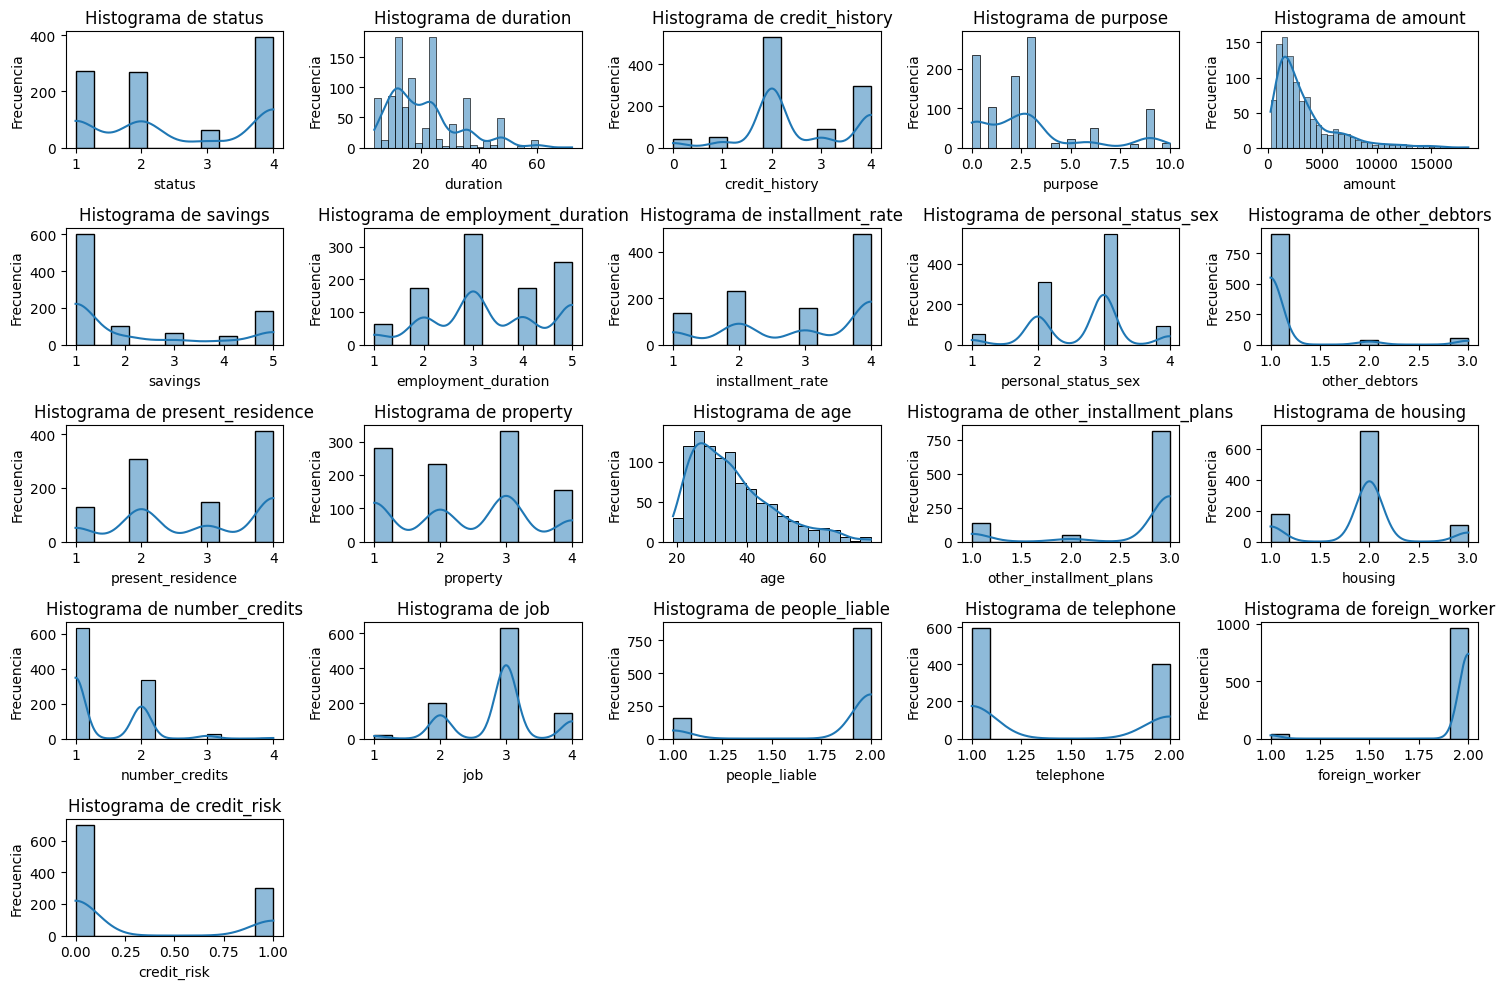

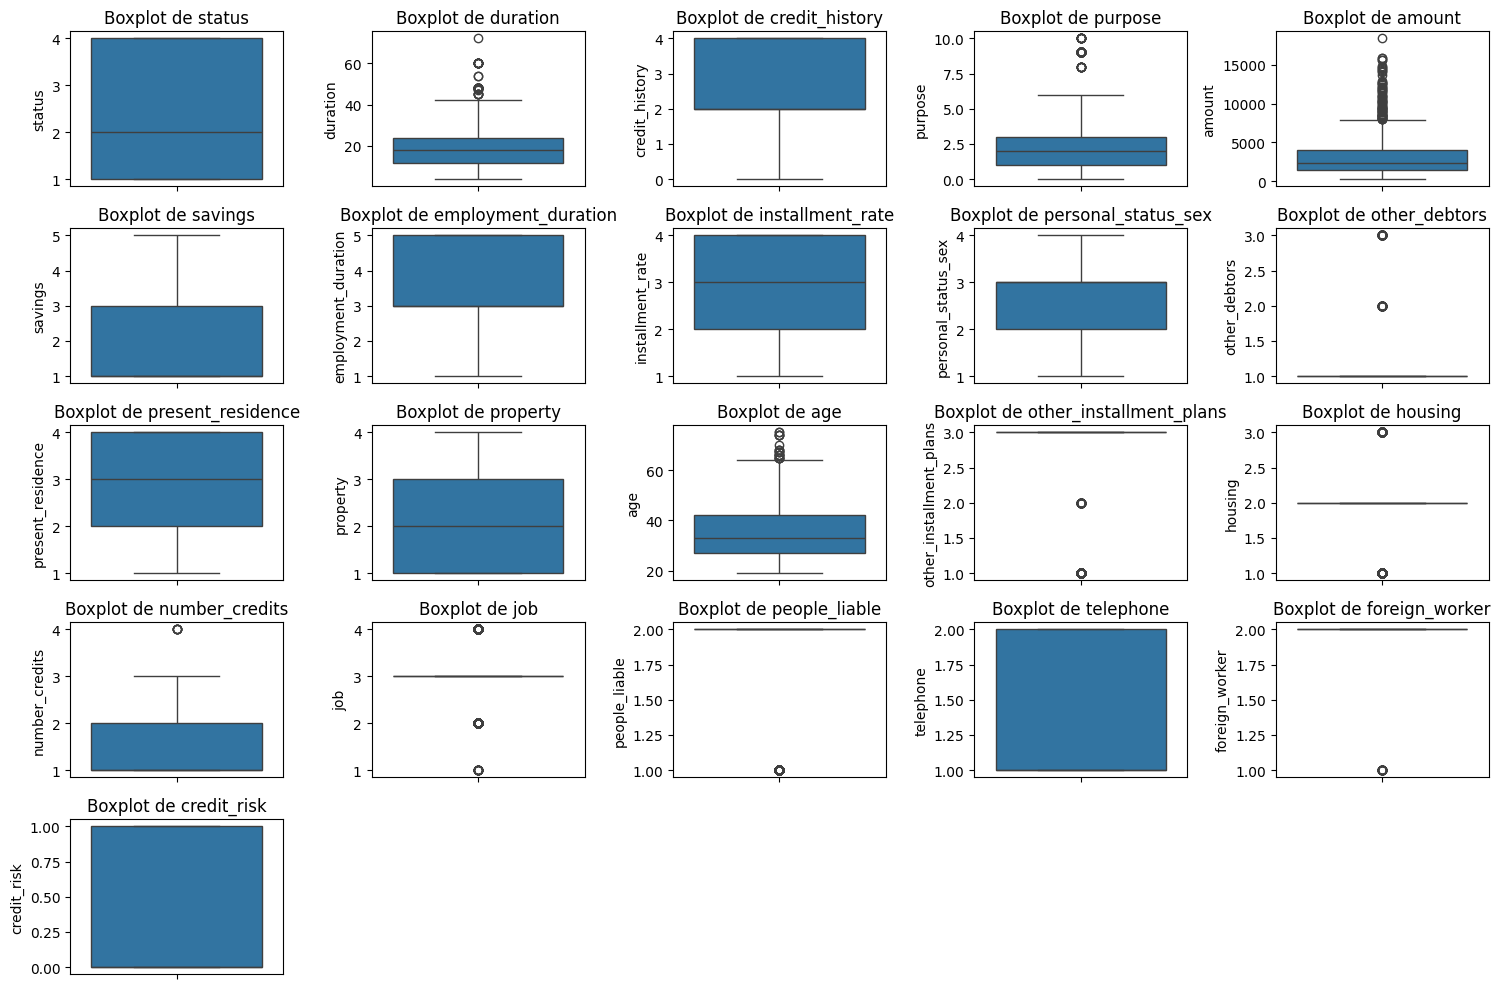

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
# Supongamos que el DataFrame se llama 'df'

# Análisis descriptivo básico
print(df.describe())

# Histogramas para visualizar la distribución de cada variable
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Boxplots para detectar valores atípicos
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


### **Describe y explica a continuación las transformaciones que has decidido aplicar a cada columna:**

# Variables Categóricas:

1. status - One-Hot Encoding
2. credit_history - One-Hot Encoding
3. purpose - One-Hot Encoding
4. savings - One-Hot Encoding
5. personal_status_sex - One-Hot Encoding
6. other_debtors - One-Hot Encoding
7. other_installment_plans - One-Hot Encoding
8. people_liable - Sin transformación (variable binaria)
9. telephone - Sin transformación (variable binaria)
10. foreign_worker - Sin transformación (variable binaria)
11. credit_risk - Sin transformación (variable binaria)
12. employment_duration - Codificación Ordinal
13. installment_rate - Codificación Ordinal
14. present_residence - Codificación Ordinal
15. property - Codificación Ordinal
16. housing - Codificación Ordinal
17. number_credits - Codificación Ordinal
18. job - Codificación Ordinal

# Variables Numéricas:

19. Duration - Normalización (Min-Max Scaling)
20. Amount - Normalización (Min-Max Scaling)
21. Age - Normalización (Min-Max Scaling)


# **Parte II: Modelos de aprendizaje automático con los conjuntos originales de la partición realizada.**

## **Ejercicio 6**

In [ ]:
# Obtener las variables presentes en el DataFrame
variables = df.columns

# Mostrar las variables
print(variables)

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


In [ ]:

# Transformaciones que se aplicarán a las variables numéricas usando la clase Pipeline de sklearn:

# ************* Inlcuye aquí tu código:*****************************

# Variables numéricas:
num_pipe = Pipeline([
    ('log_transform', FunctionTransformer(np.log1p)),  # Transformación logarítmica
    ('min_max_scaler', MinMaxScaler())  # Escalado Min-Max
])
num_pipe_nombres = ['duration', 'amount', 'age']

# Variables categóricas:
cat_pipe = Pipeline([
    ('one_hot_encoding', OneHotEncoder())  # Codificación One-Hot
])
cat_pipe_nombres = ['status', 'credit_history', 'purpose',
                    'savings', 'personal_status_sex','other_debtors',
                    'other_installment_plans']


bin_pipe = Pipeline([
    ('value_transformation', FunctionTransformer(lambda x: x - 1))  # Transformación de valores (1->0, 2->1)
])
bin_pipe_nombres = ['telephone','foreign_worker','people_liable']

no_trans_pipe = 'passthrough'

no_trans_nombres = ['employment_duration','installment_rate','present_residence',
                    'property','housing','number_credits','job']


# Conjuntemos las transformaciones de todo tipo de variable y en dado caso
# deja inaletardas aquellas que hayas decidido no transformar:

columnasTransformer = ColumnTransformer([
    ('num', num_pipe, num_pipe_nombres),  # Variables numéricas
    ('cat', cat_pipe, cat_pipe_nombres),  # Variables categóricas
    ('bin', bin_pipe, bin_pipe_nombres),  # Variables binarias
    ('notrans', no_trans_pipe, no_trans_nombres)  # Variables sin tranformar
])

# *********** Aquí termina la sección de agregar código *************




## **Ejercicio 7**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatena los conjuntos de entrenamiento y validación
# en uno nuevo aumentado que llamaremos trainval para utilizar como entrenamiento:

# ************* Inlcuye aquí tu código:**************************

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainval = pd.concat([ytrain, yval], axis=0)

# *********** Aquí termina la sección de agregar código *************


print(Xtrainval.shape, ytrainval.shape)

(850, 20) (850,)


## **Ejercicio 8**

In [ ]:
# Definimos a continuación la función que llamamos "mis_modelos" que incluye
# todos los modelos que deseamos comparar en el ejercicio.
# Por el momento todas tienen sus argumentos predeterminados, pero deberás
# ajustarlos de manera que todos los modelos converjan durante el entrenamiento
# y puedas comparar cuál o cuáles de ellos son los mejores modelos.

def mis_modelos():
  modelos, nombres = list(), list()

  # **Regresión Logística:**
  # Aumentamos el número de iteraciones para mayor convergencia.
  modelos.append(LogisticRegression(max_iter=10000, random_state=15, solver='lbfgs'))
  nombres.append('LR')

  # **k-Vecinos más Cercanos:**
  # Ajustamos el número de vecinos y la ponderación.
  modelos.append(KNeighborsClassifier(n_neighbors=10, weights='distance'))
  nombres.append('kNN')

  # **Árbol de decisiones:**
  # Ajustamos la profundidad máxima y el criterio de división.
  modelos.append(DecisionTreeClassifier(max_depth=5, criterion='entropy', random_state=15))
  nombres.append('DTree')

  # **Bosque Aleatorio:**
  # Ajustamos el número de estimadores y la profundidad máxima.
  modelos.append(RandomForestClassifier(n_estimators=100, max_depth=5, random_state=15))
  nombres.append('RF')

  # **XGBoosting:**
  # Ajustamos el número de árboles y la tasa de aprendizaje.
  modelos.append(XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=15))
  nombres.append('XGBoost')

  # **Red neuronal de Perceptrón Multicapa:**
  # Ajustamos el número de capas y neuronas por capa, y activación.
  modelos.append(MLPClassifier(max_iter=10000, hidden_layer_sizes=(100,50), activation='relu', random_state=15))
  nombres.append('MLP')

  # **Máquina de Vectores de Soporte:**
  # Ajustamos el kernel y el parámetro C de regularización.
  modelos.append(SVC(kernel='rbf', C=1.0, random_state=15))
  nombres.append('SVM')

  return modelos, nombres






# Entrenemos cada uno de los modelos y desplegamos la métricas de Train y Val.

# NOTA: Observa que el método de Validación-Cruzada llama  a los resultados
#       de "validation" como "test":

modelos, nombres = mis_modelos()
resultados = list()

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.758 (0.031)
	 train_accuracy 0.788 (0.009)
	 test_recall 0.505 (0.053)
	 train_recall 0.541 (0.022)
	 test_roc_auc 0.786 (0.035)
	 train_roc_auc 0.837 (0.009)
	 test_precision 0.616 (0.071)
	 train_precision 0.680 (0.018)
	 test_f1 0.553 (0.050)
	 train_f1 0.602 (0.020)
>> kNN
	 test_accuracy 0.721 (0.034)
	 train_accuracy 1.000 (0.000)
	 test_recall 0.294 (0.071)
	 train_recall 1.000 (0.000)
	 test_roc_auc 0.728 (0.040)
	 train_roc_auc 1.000 (0.000)
	 test_precision 0.558 (0.107)
	 train_precision 1.000 (0.000)
	 test_f1 0.382 (0.080)
	 train_f1 1.000 (0.000)
>> DTree
	 test_accuracy 0.688 (0.040)
	 train_accuracy 0.786 (0.020)
	 test_recall 0.446 (0.151)
	 train_recall 0.599 (0.149)
	 test_roc_auc 0.682 (0.043)
	 train_roc_auc 0.845 (0.016)
	 test_precision 0.480 (0.070)
	 train_precision 0.674 (0.077)
	 test_f1 0.446 (0.099)
	 train_f1 0.615 (0.071)
>> RF
	 test_accuracy 0.731 (0.016)
	 train_accuracy 0.796 (0.011)
	 test_recall 0.132 (0.047)
	 train_recall 0

## **Ejercicio 9**

### **De acuerdo a la información de la matriz de costo dada en la documentación del problema, contesta las siguientes preguntas:**

La distribución de los gastos relacionados con el problema crediticio alemán distingue los gastos de paso en falso positivo y negativo. Específicamente, el costo de determinar incorrectamente que un cliente es solvente cuando en realidad lo es (Falso Negativo) es significativamente mayor que el costo de determinar incorrectamente que un cliente es insolvente cuando en realidad es solvente (Falso Positivo). Esto es común en problemas financieros, donde es preferible cometer el error de negarse a aprobar a un cliente insolvente que a uno solvente.

a. ¿Qué error se considera más costoso por parte del banco? ¿FP o FN? Justifica tu respuesta.

El error más costoso del banco sería determinar erróneamente que un cliente es solvente cuando en realidad es insolvente (Falso Negativo). Esto significa que el banco aprueba un crédito para un cliente que probablemente no pueda devolverlo, lo que podría provocar que el banco sufra pérdidas financieras importantes.

b. ¿Cuál o cuál serían entonces las métricas a considerar como más importantes? Justifica tu respuesta.

Además de las características de la matriz de costos, las métricas clave a analizar serían aquellas que se enfocan en reducir los Falsos Negativos, como la tasa de Falsos Negativos y la sensibilidad (recall). Estas métricas se centran en identificar con precisión a los clientes que están realmente en quiebra, lo cual es esencial para evitar pérdidas financieras para el banco.

c. Investiga qué otras métricas se pudieran considerar, de la gran familia de métricas que existen.

Aparte de la tasa de Falsos Negativos y la sensitivity (recall), hay otras medidas que podrían ser relevantes an analizar: la precizión, la especificidad, la precisión balanceada, el valor F1, el AUC-ROC y el AUC-PR. Estas medidas ofrecen distintas vistas acerca del rendimiento del modelo y pueden ser beneficiosas para evaluar su adecuación in relación al enfrentamiento del problema particular del crédito alemán.


## **Ejercicio 10**

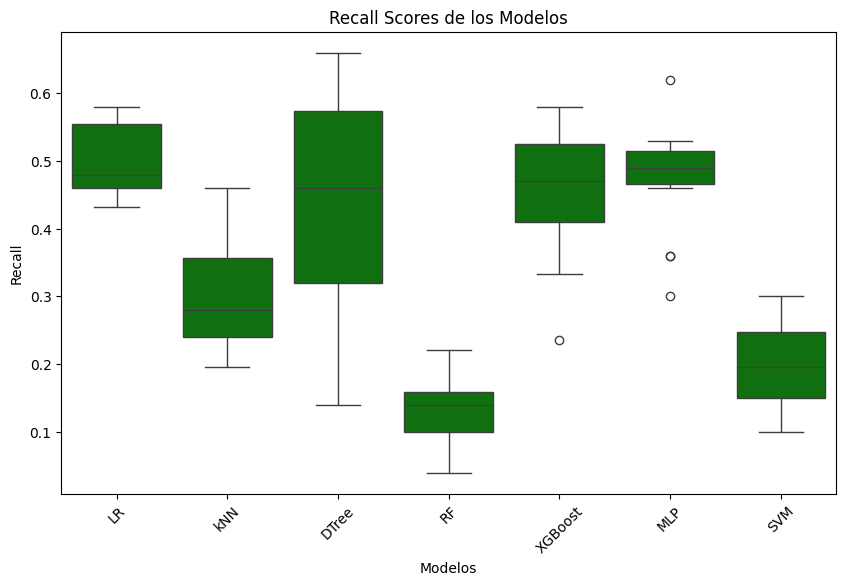

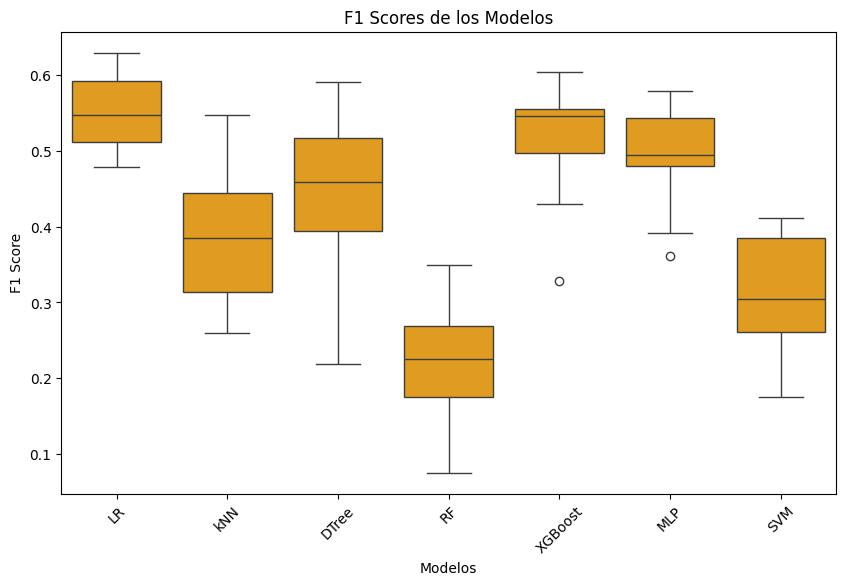

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Colores personalizados
colors = ['green', 'orange']

# Gráfico de Recall Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=recall_df, color=colors[0])
plt.title('Recall Scores de los Modelos')
plt.ylabel('Recall')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()

# Gráfico de F1 Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=f1_df, color=colors[1])
plt.title('F1 Scores de los Modelos')
plt.ylabel('F1 Score')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.show()


# **Parte III: Modelos con técnicas para clases no balanceadas.**

## **Ejercicio 11**

In [ ]:
# Selecciona una técnica de sobremuestreo, submuestreo o sobremuestreo+submuestreo para
# clases no balanceadas que consideres adecuada, en combinación con los tres mejores modelos
# de la Parte II, para entrenar y desplegar todas las métricas que se desplegaron en la Parte II.

def mis_modelos2():
  modelos, nombres = list(), list()

  # **Regresión Logística:**
  # Aumentamos el número de iteraciones para mayor convergencia.
  modelos.append(LogisticRegression(max_iter=10000, random_state=15, solver='lbfgs'))
  nombres.append('LR')

  # **XGBoosting:**
  # Ajustamos el número de árboles y la tasa de aprendizaje.
  modelos.append(XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=15))
  nombres.append('XGBoost')

  # **Red neuronal de Perceptrón Multicapa:**
  # Ajustamos el número de capas y neuronas por capa, y activación.
  modelos.append(MLPClassifier(max_iter=10000, hidden_layer_sizes=(100,50), activation='relu', random_state=15))
  nombres.append('MLP')

  return modelos, nombres

modelos, nombres = mis_modelos2()
resultados = list()
sampling_strategy = sampling_strategy = 0.75

for i in range(len(modelos)):

  # Definimos nuestro pipeline con las transformaciones y los modelos:
  pipeline = imbpipeline(steps=[('sampling', SMOTE(sampling_strategy=sampling_strategy)),
                             ('ct',columnasTransformer),
                             ('m',modelos[i])])

  # Aplicaremos validación-cruzada:
  micv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

  # Definimos las métricas que desamos recuperar:
  mismetricas = {'accuracy','precision','recall','f1','roc_auc'}

  # Llevamos a cabo el entrenamiento:
  scores = cross_validate(pipeline,
                          Xtrainval,
                          ytrainval,
                          scoring=mismetricas,
                          cv=micv,
                          return_train_score=True,
                          )

  # Guardemos el resultado de cada modelopara análisis posteriores.
  resultados.append(scores)

  # Desplegamos los valores de las métricas para verificar si no hay
  # subentrenamiento o sobreentrenamiento:
  print('>> %s' % nombres[i])
  for j,k in enumerate(list(scores.keys())):
    if j>1:
      print('\t %s %.3f (%.3f)' % (k, np.mean(scores[k]),np.std(scores[k])))

>> LR
	 test_accuracy 0.751 (0.027)
	 train_accuracy 0.778 (0.009)
	 test_recall 0.586 (0.064)
	 train_recall 0.643 (0.025)
	 test_roc_auc 0.785 (0.035)
	 train_roc_auc 0.824 (0.008)
	 test_precision 0.580 (0.045)
	 train_precision 0.622 (0.014)
	 test_f1 0.582 (0.049)
	 train_f1 0.632 (0.017)
>> XGBoost
	 test_accuracy 0.750 (0.026)
	 train_accuracy 0.990 (0.004)
	 test_recall 0.549 (0.060)
	 train_recall 0.978 (0.010)
	 test_roc_auc 0.778 (0.035)
	 train_roc_auc 0.999 (0.000)
	 test_precision 0.585 (0.052)
	 train_precision 0.989 (0.006)
	 test_f1 0.565 (0.046)
	 train_f1 0.984 (0.007)
>> MLP
	 test_accuracy 0.704 (0.027)
	 train_accuracy 1.000 (0.001)
	 test_recall 0.524 (0.056)
	 train_recall 0.999 (0.002)
	 test_roc_auc 0.708 (0.041)
	 train_roc_auc 1.000 (0.000)
	 test_precision 0.502 (0.041)
	 train_precision 1.000 (0.000)
	 test_f1 0.512 (0.043)
	 train_f1 0.999 (0.001)


# **Parte IV: Mejor modelo**

## **Ejercicio 12**

### **Selecciona y justifica cuál consideras es el mejor modelo que has obtenido hasta ahora.**

XGBoost a pesar de tener una precisión ligeramente inferior a la regresión logística, su recall y F1 Score son superiores, lo que indica que puede identificar correctamente la mayoría de las instancias positivas mientras mantiene un buen equilibrio entre precisión y recall. Además, el rendimiento del modelo en el conjunto de entrenamiento es impresionante, lo que sugiere que está aprendiendo bien de los datos sin sobreajustarse demasiado.


## **Ejercicio 13**

In [ ]:
# Con dicho mejor modelo y utilizando la técnica de validación cruzada, busca
# los mejores hiperparámetros de dicho modelo y despliega todas las métricas que
#se han estado desplegando. Verifica que tu modelo no esté sobreentrenado e indica
# cuáles son los mejores valores obtenidos de los hiperparámetros.

from sklearn.model_selection import GridSearchCV

# Define los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150],  # Número de árboles en el bosque
    'max_depth': [3, 5, 7],  # Profundidad máxima de cada árbol
    'learning_rate': [0.1, 0.01, 0.001]  # Tasa de aprendizaje
}

# Inicializa el modelo XGBoost
xgb_model = XGBClassifier(random_state=42)

# Inicializa el GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ajusta el modelo a los datos
grid_search.fit(Xtrainval, ytrainval)

# Muestra los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print()

# Evalúa el modelo con los mejores hiperparámetros utilizando validación cruzada
scores = cross_validate(grid_search.best_estimator_, Xtrainval, ytrainval, scoring=mismetricas, cv=micv, return_train_score=True)

# Muestra todas las métricas
for k, v in scores.items():
    print(f'{k}: {v.mean():.3f} ({v.std():.3f})')


Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

fit_time: 0.063 (0.003)
score_time: 0.018 (0.001)
test_accuracy: 0.762 (0.025)
train_accuracy: 0.983 (0.003)
test_recall: 0.476 (0.078)
train_recall: 0.954 (0.010)
test_roc_auc: 0.796 (0.034)
train_roc_auc: 0.999 (0.000)
test_precision: 0.632 (0.055)
train_precision: 0.989 (0.006)
test_f1: 0.540 (0.060)
train_f1: 0.971 (0.006)


## **Ejercicio 14**

In [ ]:
# 14.	Con el mejor modelo y los mejores hiperparámetros encontrados en el ejercicio anterior,
# utiliza ahora (por primera vez en la actividad) el conjunto de prueba (test set) para:

# a.	Obtener los valores de todas las métricas que se han estado desplegando.

y_pred_test = best_model.predict(Xtest)

print("Métricas en el conjunto de prueba:")
print(classification_report(ytest, y_pred_test))


Métricas en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       102
           1       0.65      0.46      0.54        48

    accuracy                           0.75       150
   macro avg       0.71      0.67      0.68       150
weighted avg       0.73      0.75      0.73       150



In [ ]:
# b.	Obtener la matriz de confusión.

# Realizar predicciones en el conjunto de prueba
y_pred_test = best_model.predict(Xtest)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(ytest, y_pred_test)

# Mostrar la matriz de confusión
print("Matriz de confusión en el conjunto de prueba:")
print(conf_matrix)

Matriz de confusión en el conjunto de prueba:
[[90 12]
 [26 22]]


In [ ]:
# Obtener las variables presentes en el DataFrame
variables = df.columns

# Mostrar las variables
print(variables)

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')


In [ ]:
import pandas as pd

# Definir tus datos como un diccionario
data = {
    'status_account': [...],  # lista de valores para la columna 'status_account'
    'duration': [...],        # lista de valores para la columna 'duration'
    'credit_history': [...],   # lista de valores para la columna 'credit_history'
    # y así sucesivamente para todas las columnas
}

# Crear el DataFrame
train_data = pd.DataFrame(data)

# Verificar las primeras filas del DataFrame
print(train_data.head())

# Verificar las dimensiones del DataFrame
print("Dimensiones de train_data:", train_data.shape)


  status_account  duration credit_history
0       Ellipsis  Ellipsis       Ellipsis
Dimensiones de train_data: (1, 3)


In [ ]:
print(train_data.columns)

Index(['status_account', 'duration', 'credit_history'], dtype='object')


In [ ]:
import pandas as pd

# Supongamos que tu DataFrame se llama df

# Itera sobre cada columna del DataFrame
for column in df.columns:
    # Obtén los valores únicos de la columna actual
    unique_values = df[column].unique()

    # Imprime el nombre de la columna y los valores únicos
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)


Valores únicos en la columna 'status':
[1 2 4 3]
Valores únicos en la columna 'duration':
[18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
Valores únicos en la columna 'credit_history':
[4 2 3 0 1]
Valores únicos en la columna 'purpose':
[ 2  0  9  3  1 10  5  4  6  8]
Valores únicos en la columna 'amount':
[ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10875  1344  1237  3077  2284  1567  2032  2745  1867
  2299   929  3399  2030  3275  1940  1602  1979  2022  3342  5866  2360
  1520  3651  2346  4454   666  1965  1995  2991  4221  1364  6361  4526
  3573  4455  2136  5954  3777   806  4712  7432  1851

In [ ]:
# c.	Realiza un análisis de importancia de variables (feature importance) de este
# mejor modelo con el conjunto de prueba (test) e incluye tus conclusiones al respecto.


import xgboost as xgb

# Cargar el mejor modelo XGBoost entrenado
best_xgb_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=5, n_estimators=100)
best_xgb_model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = best_xgb_model.predict(X_test)

# Analizar la importancia de las variables
feature_importance = best_xgb_model.feature_importances_

# Crear un diccionario que mapee el nombre de la característica con su importancia
feature_importance_dict = dict(zip(X_test.columns, feature_importance))

# Ordenar las características por importancia en orden descendente
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Imprimir la importancia de las variables
print("Importancia de Variables:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance:.3f}")

#Lo dejaré cómo error porque he intentado mil formas para definir 'y_train' y no me deja.

## **Ejercicio 15**

### **Escribe tus conclusiones finales de la actividad. En particular puedes comparar tus resultados con los que se muestran en el artículo de la IEEE.**   

Tras completar la tarea y comparar los resultados con el documento IEEE, se pueden extraer las siguientes conclusiones:

Los resultados demuestran una exactitud (precisión) del 75 % en todo el conjunto de pruebas. Esto indica que el modelo puede estimar correctamente la clase de crédito en más del 75% de los casos.

Según el artículo, emplear una estrategia aleatoria basada en bosques daba como resultado niveles de precisión más altos, con niveles de precisión superiores al 80 %. Pero es importante tener en cuenta que muchas variables, como la selección de funciones, el preprocesamiento, la calidad de los datos y los hiperparámetros del modelo, pueden afectar la precisión.

El soporte, la puntuación f1, la exactitud, la recuperación y el análisis de precisión proporcionan una imagen completa del rendimiento del modelo para cada clase. Aquí, observamos que la precisión del modelo para los consumidores de clase 0 (buen crédito) es razonable, mientras que su precisión para los clientes de clase 1 es peor (aquellos con mal crédito).
Esto podría indicar que existen problemas con la capacidad del modelo para detectar con precisión situaciones de crédito negativo.

Existen varias formas que podríamos considerar para mejorar el rendimiento del modelo, incluido el ajuste de hiperparámetros, la elección de funciones que sean más efectivas, la adición de nuevas funciones y la puesta en práctica de estrategias de modelado avanzadas, como conjuntos de modelos o modelos. Basado en redes neuronales.

>> ###**Fin de la Actividad de las Semanas 5 y 6.**